# **Mount Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Imports**


In [2]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import inspect
from scipy import linalg
import math
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
from numpy.ma.core import zeros_like

# **Loading Images**

In [4]:
dir_path = "/content/drive/MyDrive/CV-Assignment3/Images"
left_images = [0] * 3
right_images = [0] * 3
for filename in os.listdir(dir_path):
  image_name = filename.split(".")[0]
  image = cv2.imread(os.path.join(dir_path,filename))
  if image_name[0] == "l":
    left_images[int(image_name[1])-1] = image
  else:
    right_images[int(image_name[1])-1] = image

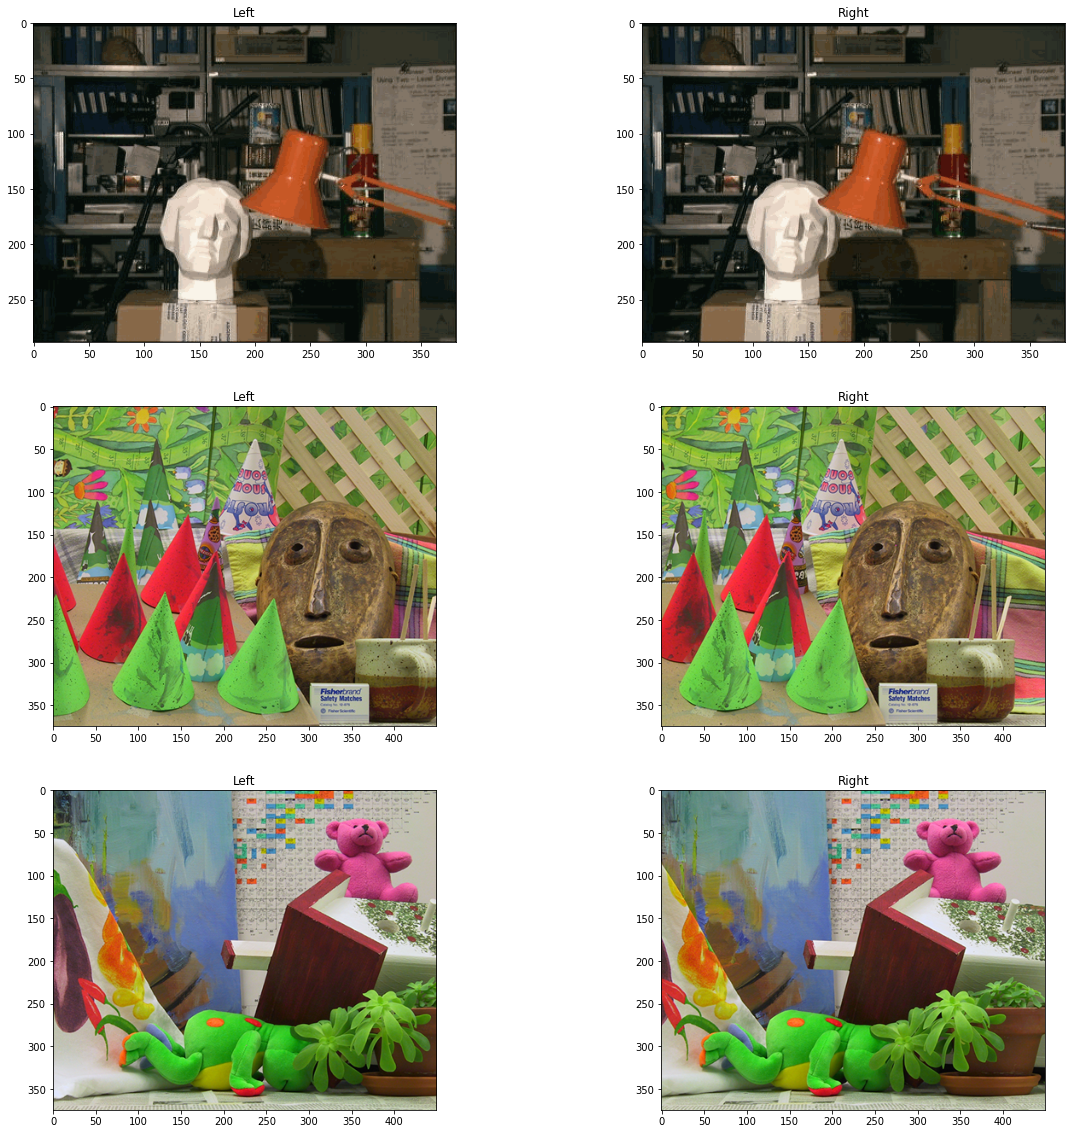

In [5]:
fig = plt.figure(figsize=(20,20))
for i in range(1,6,2):
  ax = fig.add_subplot(3, 2, i)
  imgplot = plt.imshow(cv2.cvtColor(left_images[i//2],cv2.COLOR_BGR2RGB))
  ax.set_title('Left')
  ax = fig.add_subplot(3, 2, i+1)
  imgplot = plt.imshow(cv2.cvtColor(right_images[i//2],cv2.COLOR_BGR2RGB))
  ax.set_title('Right')

In [ ]:
for i in range(3):
  print(f"Image #{i+1}: left image shape {left_images[i].shape} right image shape {right_images[i].shape}")

Image #1: left image shape (289, 382, 3) right image shape (289, 382, 3)
Image #2: left image shape (375, 450, 3) right image shape (375, 450, 3)
Image #3: left image shape (375, 450, 3) right image shape (375, 450, 3)


# **Block Matching**

In [ ]:
def calc_disparity(left,right,window,max_offset,cost_fn):
  left = cv2.cvtColor(left,cv2.COLOR_BGR2GRAY)
  right = cv2.cvtColor(right,cv2.COLOR_BGR2GRAY)
  disparity = np.zeros(left.shape,np.uint8)
  w = left.shape[1]
  h = left.shape[0]
  half_window = window//2
  adjust_factor = 255/max_offset

  #pass over each row
  for i in tqdm(range(half_window, h-half_window)):
    #pass over each column
    for j in range(half_window,w-half_window):
      min_limit = max(half_window,j-max_offset)
      max_limit = min(w, j+max_offset-half_window)
      if window==1:
        values = np.abs(right[i][min_limit:max_limit] - left[i][j])
        if cost_fn == "SSD":
          values = values**2
        index = np.argmin(values) + min_limit
        disparity[i][j] = np.abs(index-j)
      else:
        reference = left[i-half_window:i+half_window+1,j-half_window:j+half_window+1]
        minimum = math.inf
        index = -1

        for k in range(min_limit,max_limit-window+1):
          values = np.abs(right[i-half_window:i+half_window+1,k-half_window:k+half_window+1] - reference)
          if cost_fn =="SSD":
            values = values**2
          value = np.sum(values)
          if value < minimum:
            minimum = value
            index = k
        disparity[i][j] = np.abs(index-j)
    disparity_map = disparity.copy()
    disparity_map = (disparity_map*adjust_factor).astype('uint8')
  return disparity_map

In [ ]:
combinations = [[1,"SAD",30],[5,"SAD",30],[9,"SAD",30],[1,"SSD",30],[5,"SSD",30],[9,"SSD",30]]
disparity_maps = []
m=0
for [w,cost_fn,max_offset] in combinations:
  disparity_maps.append(calc_disparity(left_images[m],right_images[m],w,max_offset,cost_fn))

100%|██████████| 281/281 [00:48<00:00,  5.85it/s]


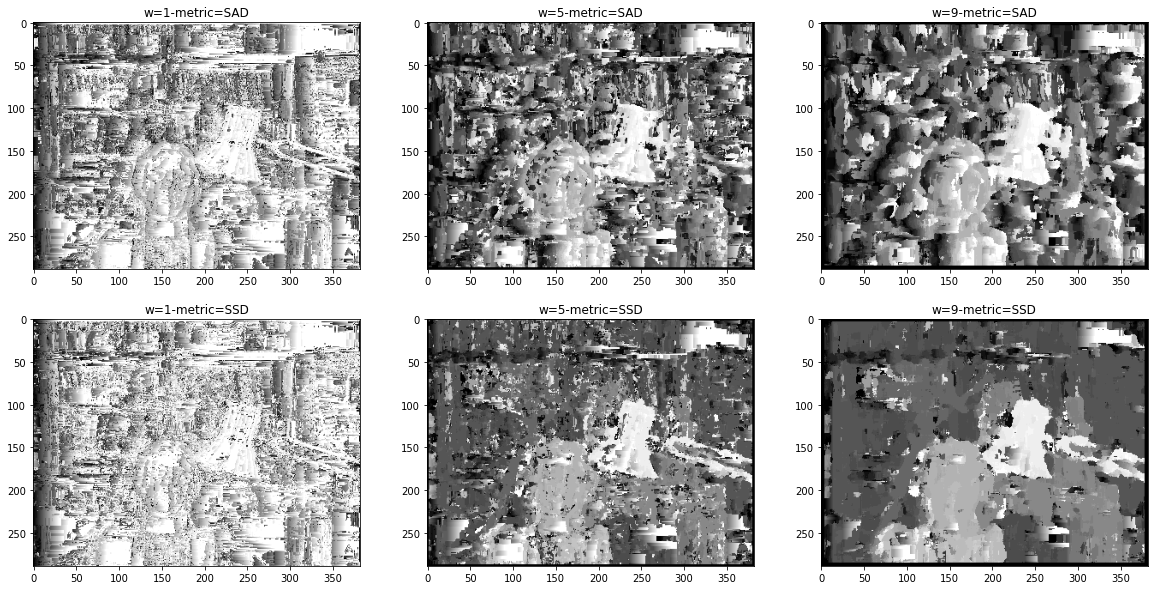

In [ ]:
fig = plt.figure(figsize=(20,10))
for i in range(1,7):
  ax = fig.add_subplot(2, 3, i)
  imgplot = plt.imshow(disparity_maps[i-1],cmap='gray', vmin=0, vmax=255)
  ax.set_title(f'w={combinations[i-1][0]}-metric={combinations[i-1][1]}')

100%|██████████| 269/269 [00:31<00:00,  8.55it/s]


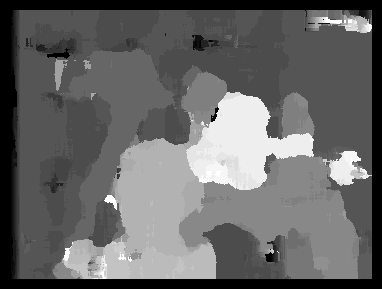

In [ ]:
cv2_imshow(calc_disparity(left_images[0],right_images[0],20,30,"SSD"))

In [ ]:
combinations = [[1,"SAD",50],[5,"SAD",50],[9,"SAD",50],[1,"SSD",50],[5,"SSD",50],[9,"SSD",50]]
disparity_maps = []
m=1
for [w,cost_fn,max_offset] in combinations:
  disparity_maps.append(calc_disparity(left_images[m],right_images[m],w,max_offset,cost_fn))

100%|██████████| 367/367 [02:03<00:00,  2.98it/s]


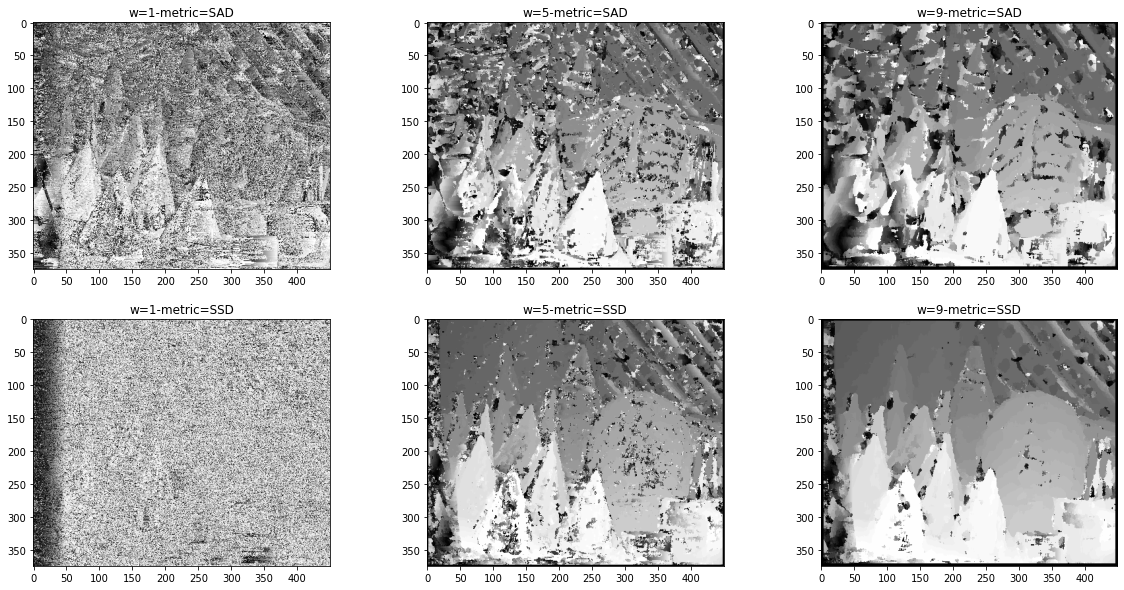

In [ ]:
fig = plt.figure(figsize=(20,10))
for i in range(1,7):
  ax = fig.add_subplot(2, 3, i)
  imgplot = plt.imshow(disparity_maps[i-1],cmap='gray', vmin=0, vmax=255)
  ax.set_title(f'w={combinations[i-1][0]}-metric={combinations[i-1][1]}')

100%|██████████| 355/355 [01:43<00:00,  3.42it/s]


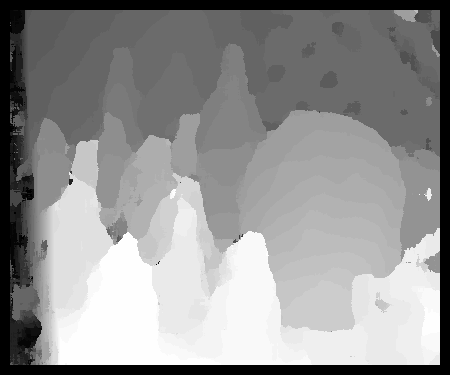

In [ ]:
cv2_imshow(calc_disparity(left_images[1],right_images[1],20,50,"SSD"))

In [ ]:
combinations = [[1,"SAD",50],[5,"SAD",50],[9,"SAD",50],[1,"SSD",50],[5,"SSD",50],[9,"SSD",50]]
disparity_maps = []
m=2
for [w,cost_fn,max_offset] in combinations:
  disparity_maps.append(calc_disparity(left_images[m],right_images[m],w,max_offset,cost_fn))

100%|██████████| 367/367 [02:01<00:00,  3.03it/s]


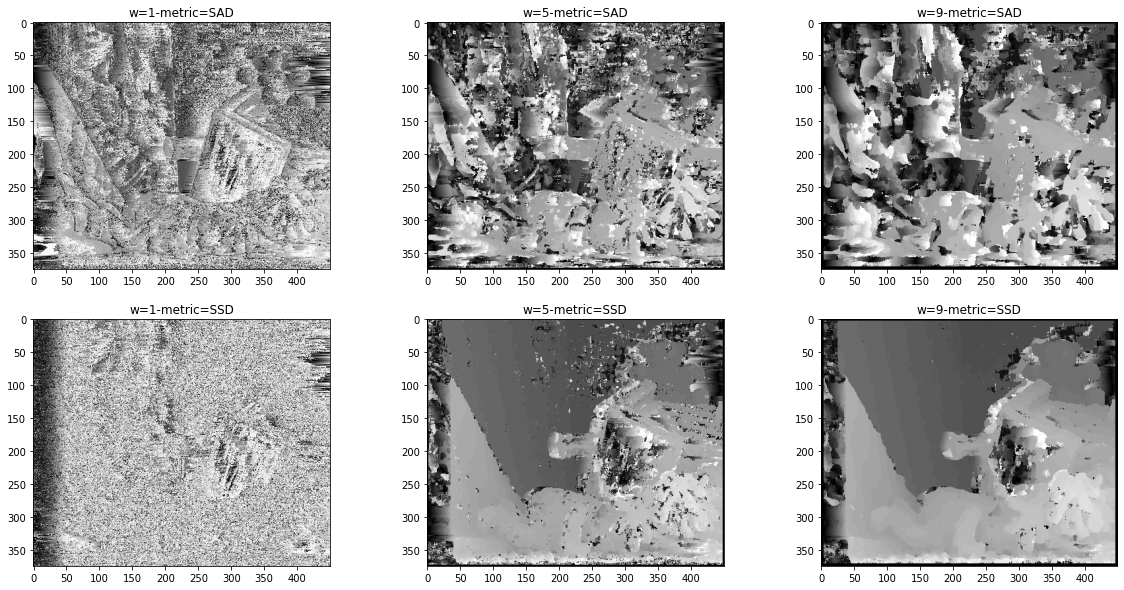

In [ ]:
#maximum offset = 50
fig = plt.figure(figsize=(20,10))
for i in range(1,7):
  ax = fig.add_subplot(2, 3, i)
  imgplot = plt.imshow(disparity_maps[i-1],cmap='gray', vmin=0, vmax=255)
  ax.set_title(f'w={combinations[i-1][0]}-metric={combinations[i-1][1]}')

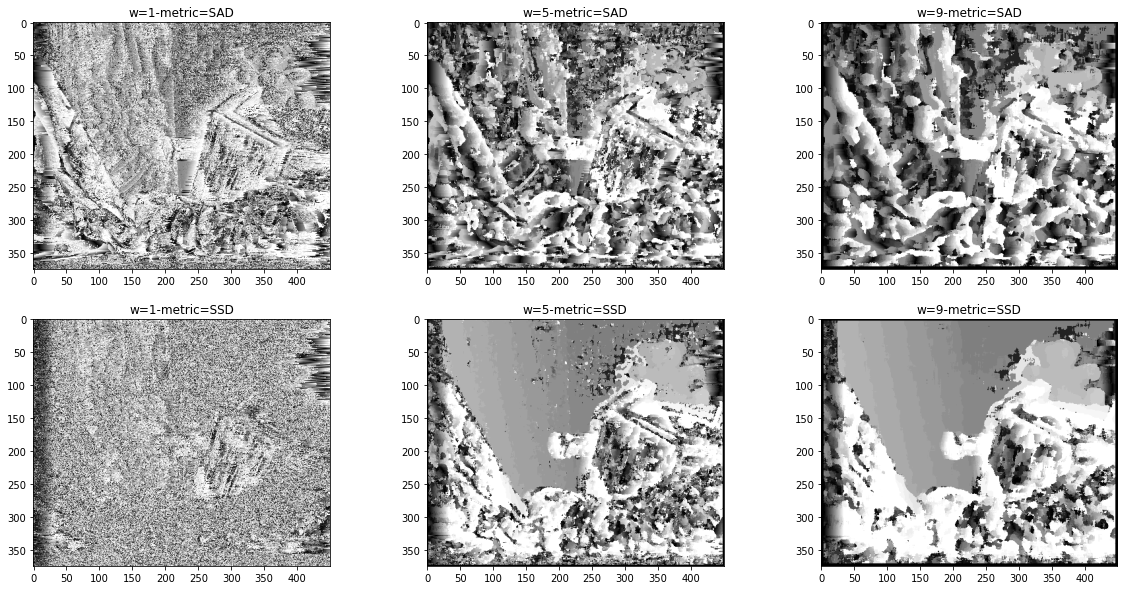

In [ ]:
#maximum offset = 30
fig = plt.figure(figsize=(20,10))
for i in range(1,7):
  ax = fig.add_subplot(2, 3, i)
  imgplot = plt.imshow(disparity_maps[i-1],cmap='gray', vmin=0, vmax=255)
  ax.set_title(f'w={combinations[i-1][0]}-metric={combinations[i-1][1]}')

100%|██████████| 367/367 [02:10<00:00,  2.82it/s]


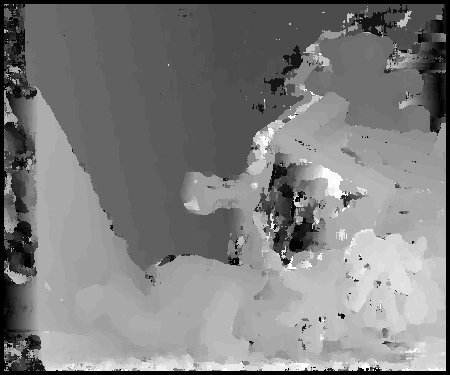

In [ ]:
cv2_imshow(calc_disparity(left_images[2],right_images[2],9,50,"SSD"))

100%|██████████| 355/355 [01:50<00:00,  3.21it/s]


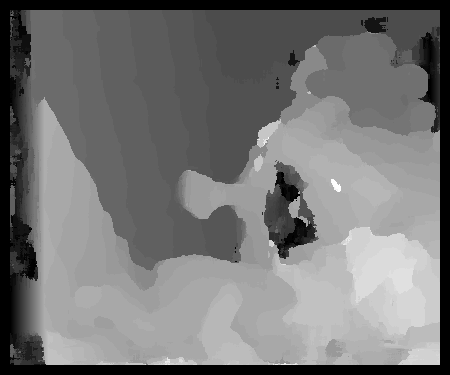

In [ ]:
cv2_imshow(calc_disparity(left_images[2],right_images[2],20,50,"SSD"))

# **Dynamic Programming**

In [6]:
C_0 = 1
SIGMA = 2

In [7]:
def err_func(sigma = SIGMA):
  return lambda x,y: ( (x-y) ** 2 ) / ( sigma ** 2)

In [8]:
def dist_func(x,y):
  return ( (x - y) ** 2 ) / ( SIGMA ** 2)

In [9]:
def compute_cost_matrix(line_l, line_r):
  D = np.zeros( ( len(line_l), len(line_r) ) , dtype='int64')
  D[0,0] = dist_func( line_l[0], line_r[0] )
  D[0,:] = D[:,0] = D[0,0] + np.linspace(start= 1, stop= len(line_r), num= len(line_r))
  for i in range( 1, len(line_l) ):
    for j in range( 1, len(line_r) ):
      D[i, j] = min(
          D[i-1,j-1] + dist_func(line_l[i], line_r[j]),
          D[i-1,j] + C_0,
          D[i,j-1] + C_0
      )
  return D      

In [ ]:
def compute_disparity(left_image, right_image):
  left_disparity = np.zeros_like(left_image)
  right_disparity = np.zeros_like(right_image)
  D = np.zeros( ( len(left_image[0]), len(right_image[0]), left_image.shape[0]) , dtype='int64')
  D[0,0,:] = dist_func( left_image[0], right_image[0] )
  D[0,:,:] = D[:,0,:] = D[0,0,:] + np.linspace(start= 1, stop= len(left_image[0]), num= len(left_image[0]))

In [ ]:
def compute_disparity_map(left_image, right_image):
  left_disparity = np.zeros_like(left_image)
  right_disparity = np.zeros_like(right_image)
  for l in range(len(left_image)):
    D = compute_cost_matrix(left_image[l], right_image[l])

    i , j = D.shape[0] -1 , D.shape[1] - 1
    while i > 0 and j > 0 :
      minVal = min( D[i - 1, j - 1], D[i - 1, j], D[i, j -1])
    
      if minVal == D[i - 1, j - 1]:
        left_disparity[l,j] = right_disparity[l,j] = np.abs(i - j)
        j -= 1
        i -= 1
      elif minVal == D[i - 1, j]:
        i -= 1
      else:
        j -= 1

  return left_disparity / np.max(left_disparity) * 255 , right_disparity / np.max(right_disparity) * 255

In [ ]:
disparity_dp = []
for l in range(3):
  left = cv2.cvtColor(left_images[l],cv2.COLOR_BGR2GRAY)
  right = cv2.cvtColor(right_images[l],cv2.COLOR_BGR2GRAY)
  s = compute_disparity_map(left, right)
  disparity_dp.append(s)

<ipython-input-31-572c1c6b2e92>:2: RuntimeWarning: overflow encountered in ubyte_scalars
  return ( (x - y) ** 2 ) / ( SIGMA ** 2)


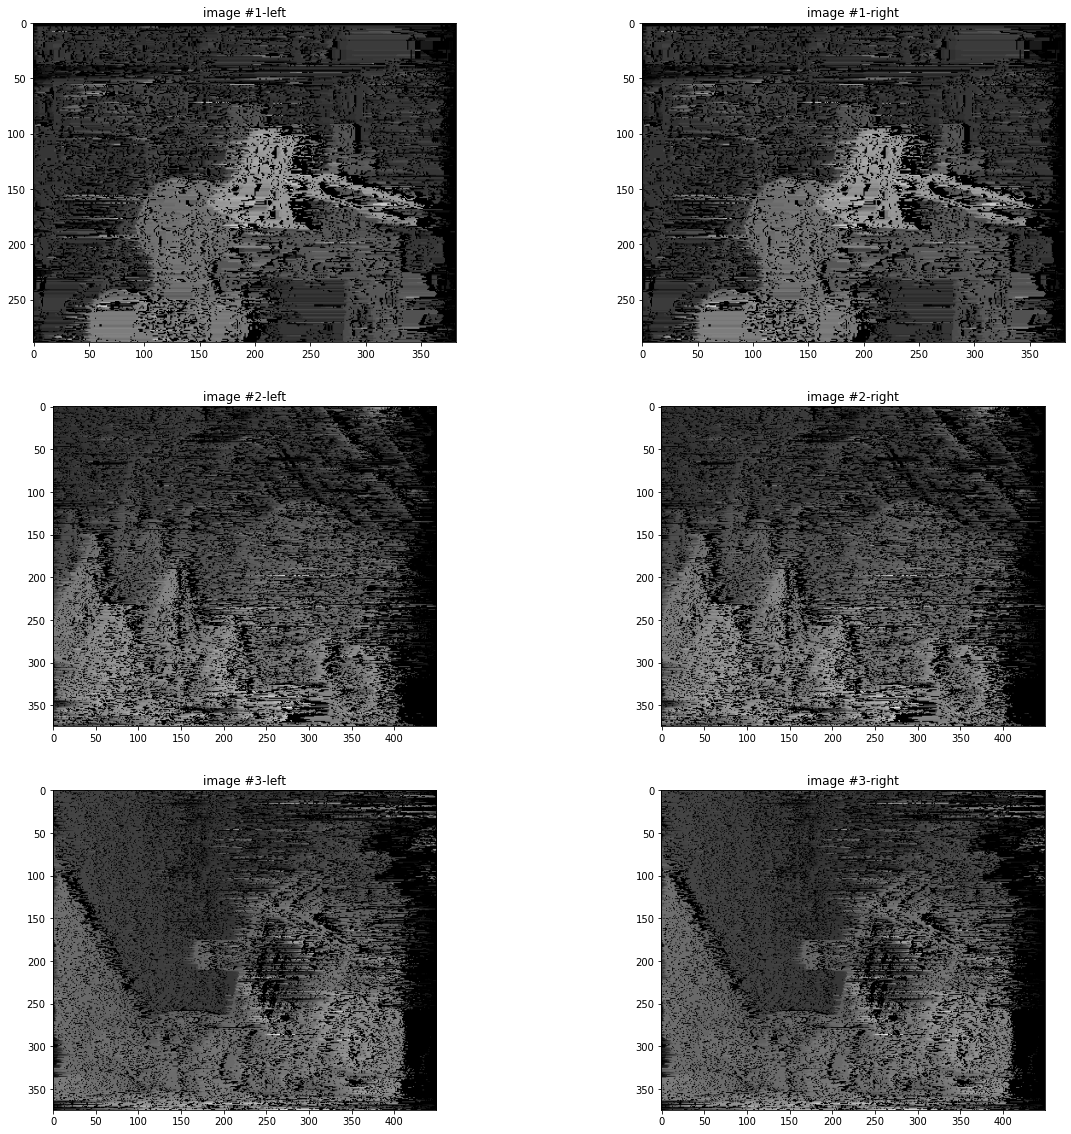

In [ ]:
fig = plt.figure(figsize=(20,20))
for i in range(1,6,2):
  ax = fig.add_subplot(3, 2, i)
  imgplot = plt.imshow(disparity_dp[i//2][0],cmap='gray', vmin=0, vmax=255)
  ax.set_title(f'image #{i//2+1}-left')
  ax = fig.add_subplot(3, 2, i+1)
  imgplot = plt.imshow(disparity_dp[i//2][1],cmap='gray', vmin=0, vmax=255)
  ax.set_title(f'image #{i//2+1}-right')

# **Bonus**

In [10]:
def get_line_map(line_l, line_r):
  D = compute_cost_matrix(line_l, line_r)
  map = np.zeros_like(D)

  i , j = D.shape[0] -1 , D.shape[1] - 1
  while i > 0 and j > 0 :
    minVal = min( D[i - 1, j - 1], D[i - 1, j], D[i, j -1])
  
    if minVal == D[i - 1, j - 1]:
      map[i-1, j-1] = 255
      j -= 1
      i -= 1
    elif minVal == D[i - 1, j]:
      map[i - 1, j] = 255
      i -= 1
    else:
      map[i, j-1] = 255
      j -= 1
  return map


In [26]:
line_l = cv2.cvtColor(left_images[0],cv2.COLOR_BGR2GRAY)[140]
line_r = cv2.cvtColor(right_images[0],cv2.COLOR_BGR2GRAY)[140]

In [27]:
map = get_line_map(line_l, line_r)

<ipython-input-8-572c1c6b2e92>:2: RuntimeWarning: overflow encountered in ubyte_scalars
  return ( (x - y) ** 2 ) / ( SIGMA ** 2)


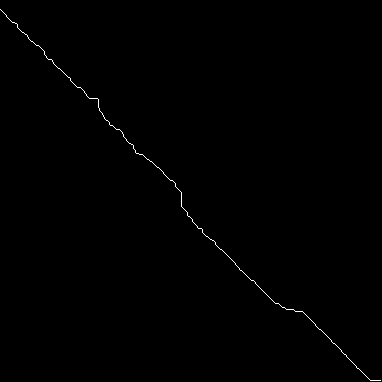

In [28]:
cv2_imshow(map)